[View in Colaboratory](https://colab.research.google.com/github/gopal2812/mlblr/blob/master/ImageCaptioningProject.ipynb)

#IMAGE CAPTIONING

#Introduction

In the past few years, neural networks have fuelled dramatic advances in image classification. Emboldened, researchers are looking seek not only to assign numerical labels to input data, but to describe the world in human terms. Image captioning is among the most popular applications in this trend. A deep learning model of Image Captioning should be fast, accurate and able to identify the wide variety of objects present in the image and caption it with the text in natural language describing the relationship between the objects and actions. It can also be called Image to Text Translation. This deep learning task combines the key concept of vision and language. We need to capture the correlation between the vision and natural language such that they map to same semantic space. With examples below, we will understand more easily what it does (the titles are predicted captions from the model):

Saving download.png to download.png


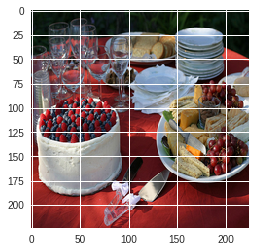

In [0]:
from IPython.display import Image
Image('download.png')

Predicted caption:

> A tray of food with vegetables and vegetables on a table eeee

True captions:

>A plate of finger foods next to a blue and raspberry topped cake.

>A nicely set dining table filled with food and a cake topped with berries.

>A close up of a table with many plates of food

>A table topped with a cake covered in berries next to a plate of sandwiches.

>A white cake topped with berries and a plate of fruit and cheeses.




#Prior work and Approaches for image captioning

**a)  Linking Image and Text with Template :**

Source Paper: 
http://www.tamaraberg.com/papers/generation_cvpr11.pdf

The main idea here is to detect the objects and their attributes, parse the sentence into phrases and learn their correspondence using models like conditional random fields (CRFs).The CRF is traditionally used for a structured prediction such as text generation. The use of CRF has limitations in generating text in a coherent manner with proper placement of prepositions. Thus it correctly predict the objects and attributes but fail at generating good descriptions.



**b)  Image Ranking: **

Source Paper:
http://papers.nips.cc/paper/4470-im2text-describing-images-using-1-million-captioned-photographs.pdf

This method relies on collecting and filtering a large data set of images from the internet to produce a novel web scale captioned photo collection. It involves the method of ranking the image and generating the caption by selection using extractive method. System Flows has been described as follows:-

    1) Input query image
    2) Candidate matched images retrieved from web scale captioned collection using global image representations
    3) High level information is extracted about image content including objects, attributes, actions, people, stuff, scenes, and TFIDF (text or detector based)weighting
    4) Images are re-ranked by combining all content estimates 
    5) Top n resulting captions


**c)  Bidirectional mapping between images and their sentence-based descriptions **

Source Paper: http://xinleic.xyz/papers/cvpr15_rnn.pdf

In this method depicts a bi-directional representation that is capable of generating both novel descriptions from images and visual representations from descriptions. It uses the
encoder, hidden layer and decoder.

    1)  The main contribution of this paper is the addition of the recurrent visual hidden layer (u). 
    2) The recurrent layer u attempts to reconstruct the visual features v from the previous words, i.e. (v) 
    3) The visual hidden layer is also used by wt to help in predicting the next word. That is, the network can compare its visual memory u, which represents what it already said, with what it currently observes v to predict what to say next.
    4) At the beginning of the sentence, u represents the prior probability of the visual features. As more words are observed, the visual features are updated to reflect the words.


**d)  DenseCap**

Source Paper: https://www.cv-foundation.org/openaccess/content_cvpr_2016/papers/Johnson_DenseCap_Fully_Convolutional_CVPR_2016_paper.pdf

This architecture processes an image with a single, efficient forward pass, requires no external regions proposals, and can be trained end-to-end with a single round of optimization. The architecture is composed of a Convolutional Network, a novel dense localization layer, and Recurrent Neural Network language model that generates the label sequences

    a) An input image is first processed a CNN. 
    b) The Localization Layer proposes regions and smoothly extracts a batch of corresponding activations using bilinear interpolation. 
    c) These regions are processed with a fully-connected recognition network and described with an RNN language model. 
    d) The model is trained end-to-end with gradient descent

**e) Deep Bidirectional LSTMs**

Source Paper:
https://arxiv.org/pdf/1604.00790v1.pdf

The model performs comparatively with the state of the art even without additional mechanism like attention model or object detection. Data augmentation techniques such as multi-crop, multi-scale and vertical mirror are used to prevent overfitting in training deep models. They have used CNN to learn visual features alexnet and 16-layer vggnet to be precise and Bidirectional LSTM to learn sentence features. End-to-end training is done by minimizing the joint loss. LSTMs are already deep, but that depth is horizontal, in which weights are reused which limits the learning of more representative features. Vertical depth can be achieved by stacking multiple LSTMs or use a MLP ((multilayer perception) in between which helps in making the net deeper with increasing too much parameters.

    a)	Their model is end to end trainable with stochastic gradient descent with BPTT algorithm. The loss at the end is the sum of loss from both forward and backward LSTMs.
    b) To infer the final sentence for the image they take that word which has the maximum probability from both forward and backward prediction.
    c) For word vector they used one-hot representation along with tokenizing and removing less occurring words


**f) Image Caption with Visual Attention **

SourcePaper:
https://arxiv.org/pdf/1502.03044v3.pdf

    a)	Attention is important as representing the whole image from one vector is not the better way
    b)	To go about scene understanding, which is what it is done in most cases. By using attention features can be dynamically used when needed which is really helpful when
    c)	There is a lot of objects in the image. Until now features from the last layer from the conv-net is used which focus on the most important part of the image, which is one way to go but is not helpful when more descriptive captions are required. So more low level features are needed from the image, but to handle so much more information a mechanism is desired.
    d)	Instead of using the final fully connected layer of CNN, the lower convolutional layer vectors are used called them annotation vectors. Each annotation vector is supposed to belong to some specific part of the image.
    e)	For the decoder part a slight variation of the widely used normal LSTM is proposed, in which along with the embedding of the word and the vector of the previous hidden state, a context vector is also passed which is to capture the visual information associated with a particular input location and is based on the previous generated word and the previous hidden state.


#WHAT WE WILL LEARN

In current tutorial, we are going to work on the Image captioning problem with the variant of DenseCap, We solve the image captioning problem by having two model, the first called an image recognition model and the second called a GRU decoder. The image recognition model describe what the image contains and output a single vector of numbers -the "thought-vector" or summary-vector, which is then input to the GRU model. This second GRU model decodes this vector into the destination-text.

In this tutorial, you will discover how to develop an encoder-decoder recurrent neural network in Python with Keras. After completing this tutorial, you will know:

    a)	How to design a small and configurable problem to evaluate encoder-decoder recurrent neural networks using pretrained weights of existing model.
    b)	How to design an encoder-decoder network for the sequence prediction problem.
    c)	How to implement GRU (Gated Recurrent Unit) model and transfer learning with Densenet in keras.
    d)	How to robustly compare and tune the performance of encoder-decoder networks with hyper parameter, Transfer learning, Pre-processing, and change in GRU layer to improve the quality of caption.
    e)	How to use caching and other python mechanism to optimize and rerun the code faster.
    f)	Transfer Learning and usage of pretrained Model.
    g)	Difference between Functional and Sequential model in keras and how and when to implement Functional model
    h)	How to save weights and reuse it.
    i)	What is resampling, attenuation and resizing using Lanczos? What apis to use in keras for it.
    j)	Speciality of Coco dataset and its structure.
    k)	How to define the Data Generator and Tokenizer in python.
    l)	Details about Loss Function : sparse_cross_entropy
    m)    We will also try to use different CNN model(vgg16 & densenet201) pretrained weigtht to identify its impact on the model.
    n)    Calculate the bleu matrics for the accuracy of result.







                              
 




#Flow Chart

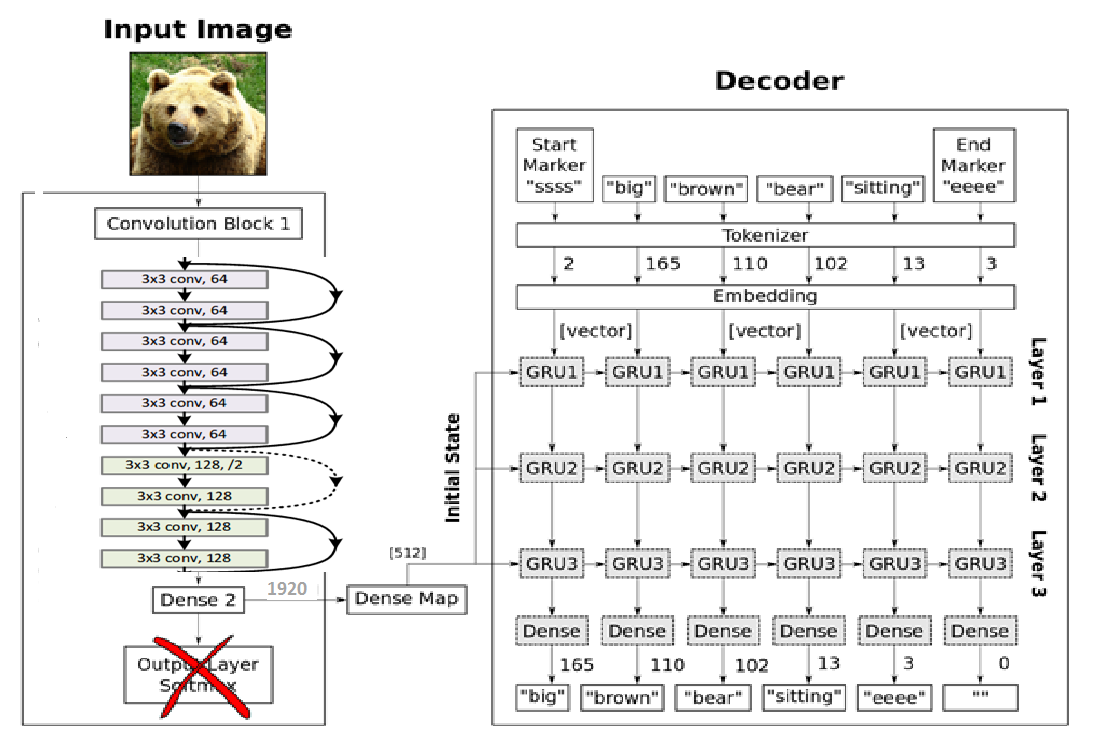

In [0]:
from IPython.display import Image
Image('flowchart.png')

**ALGORITHM**


a) We will use the weights from the keras densenet model which was pre-trained on the ImageNet data-set for classifying images. The densenet model (DenseNet201) contains a convolutional part and a Pooling layer which is used for the image classification.


b) But instead of using the last classification layer (o/p of Pooling Layer) which has been trained for the image net data set, we will redirect the output of the last but one layer as input to GRU Layer (Gated Recurrent Units). So given an image we can get the features vector of 1920 uniformly random sampled regions which summarizes the image-contents. This will now go as input to the GRU layer. We want to use that as the initial state in our decoder so that the decoder knows about the contents of the image and can transform that into a text.


c) The internal state-size of the GRU is only 512, so we need an intermediate fully-connected (dense) layer to map the vector with 1920 elements down to a vector with only 512 elements. This is the same approach which we follow in transfer learning from one model to another. We will use the tanh activation function so that it limits the output between -1 to 1.

d) Neural Networks cannot work directly on text-data. We use a two-step Pre-processing to convert text into numbers that can be used in a neural network.

    i) The first step is to convert text-words into so-called integer-tokens. 
    ii) Convert integer-tokens into vectors of floating-point numbers using a so-called embedding-layer.
    
e) The decoder is responsible for stepping through the output time steps while reading from the context vector. During Training, we give decoder three i/ps:

    i) Initial state which is calculated in step c
    ii) A sequence of integer tokens which have been converted using a tokenizer
    iii) The same sequence but shifted one time step

Idea is that we want the decoder to learn and predict the next word based on the context build so far.  For Example In image mentioned in flowchart, decoder should learn that the word “start marker” should map to the word “big”. The word “big” should map to the word “brown”. The word “brown” should map to the word “bear”. So on until we get down to the end word. Remember each word would correspond to an integer for example: the integer 165 correspond to word brown as generated by tokenizer, the word brown becomes the number 110 etc.
Internally we first inputs the first integer(word) to the embedding layer and the embedding layer then converts that integer into a 128 floating-point numbers roughly between minus 1 and 1 because the neural network cannot work on integer numbers directly.
We take that vector and input that to the first recurrent unit and combined with the initial state which was taken from the image model it will then update the internal state of the recurrent unit and it will output a vector. What we shown here in above diagram is that we have unrolled the process through the time steps so the arrow means that the internal state is sent to the next time step. Initially we have the number 165 we will put that through the embedding layer and get some vector of 128 floating point numbers out and we will input that to the gated recurrent unit then we will take the updated internal state we will process that we will output a new vector and update the internal state again.

f) We will continue this until we have processed the entire input sequence of integer tokens (caption). The o/p sequence of vectors of 512 elements will be used as the input to the second recurrent layer with the initial state (summarize image vector obtained in step c).We process that in the same way in the third recurrent layer.

g) We get a sequence of vectors out again but these have 512 elements and we somehow need to transform that into an integer between 1 and 10,000 (size of our vocabulary list). This can we achieved using the dense on fully connected layer.

h) We continue do above process for each of the time steps until we have a sequence as output. When we are training this it doesn’t give us the correct output to begin with at first it just gives us random output. We want to Train it by giving it the correct sequence of integer tokens as the output so that we compare the predicted output of the decoder with the true output which backwards propagate the errors all the way through the recurrent units.
This can also be extended to dense model but in this tutorial we won't be updating the Weights of this model over here. The learning to map from pixels over to text would have improved the performance but would have resulted in processing millions of images. Thus requires GPUs usage for long duration and not available freely anywhere.

i) When we are doing inference (predict), we start by processing the image through the image model and we get the initial state out but now we don't know what the text is so we cannot i/p the text but we i/p the initial dummy sequence "ssss" and states o/p from image model that summarizes the image contents and hope to get the next word as o/p.

j) Get the last predicted token as a one-hot encoded array. Note that this is not limited by softmax, but we just need the index of the largest element so it doesn't matter.

k) Convert to an integer-token and Lookup the word corresponding to this integer-token and Append the word to the output-text.

#Implementation Choices:
**Pretrained Image Model**:

Recent work has shown that convolutional networks can be substantially deeper, more accurate, and efficient to train if they contain shorter connections between layers close to the input and those close to the output. In this paper, we embrace this observation and introduce the Dense Convolutional Network (DenseNet), which connects each layer to every other layer in a feed-forward fashion.We have various models for image classification with weights trained on ImageNet:

Xception

VGG16

VGG19

ResNet50

InceptionV3

InceptionResNetV2

MobileNet

DenseNet

NASNet

MobileNetV2

But of these model, DenseNet201 provides the best choice provided with no of parameter used,size, top 1% accuracy, top 5 % accuracy and depth. Values for Densenet201 are as follows:

size: 80 MB	

top 1 % accuracy: 0.770	

top 5 % accuracy: 0.933	

No. of parameter: 20,242,984	

Depth: 201

**Dataset**

[Source Paper:  https://arxiv.org/pdf/1405.0312.pdf]

We used MSCOCO Dataset to train GRU models for generating the caption. The reason behind choosing MS COCO are as follows:-

    a) Caption descriptions for the image by users of Amazon’s Mechanical Turk
    b) Contains considerably more object instances per image (7.7) as compared to ImageNet (3.0) and PASCAL (2.3), hence more focus on segmenting object instance. Hence it is suitable for our requirement of images containing contextual relationships and non-iconic object views.

It has around 41K training images as well as 41K validation images with 5 captions per image. Our model was trained using the training images and since we had no way to measure the accuracy of the model, we used some of the validation images to test the performance of our model. We need first to download all images from MSCOCO challenge (20+ G in total of 120K images for both training and validation) as well as the caption files. Then, we will need to generate the followings:
Files:

-rw-rw-r-- 1 gopalg gopalg   815585330 Sep  1  2017 val2017.zip

-rw-rw-r-- 1 gopalg gopalg 19336861798 Sep  1  2017 train2017.zip

-rw-rw-r-- 1 gopalg gopalg   252907541 Sep  2  2017 annotations_trainval2017.zip

The vocabulary list of your choice (e.g. you can choose top 10000 words based on appearing frequency in the captions data set, plus 4 additional tokens of for unknown words, for start of a sentence, end of a sentence and for padding a sentence. So there are total 10000 + 4 words if you choose 10000. )

Two dictionaries of word_to_index and index_to_word, based on the vocab above.
Index all captions using this word_to_index dictionary. And pad each caption to a fixed length vector (e.g. you can choose length of 25) with and at the start and beginning, for all words not in the vocab, as well as tokens for all remaining empty spaces.
Extracted image features using Inception V3 pretrained model. Extract features from all your training and validation images using inception v3 model, and save them into numpy arrays to your local.
Finally, create train_image_index and val_image_index lists, which match each caption to the correct row index of the feature numpy arrays created above. (Basically, match each caption to each image)


**Preprocessing for MSCOCO dataset:**
 
Resizing
The images available for training were of varying dimensions, so they were resized to a single dimension. This results in some loss of information, however the processing of images is made easier and less error-prone.

Dictionary
Using all the captions available from the training dataset, a dictionary of words is created to be used for generating our own captions. Some words which are rare in the captions are left out while creating the dictionary using a threshold value function. Finally, these words are represented as a one-hot vectors given as input to the GRU.


**Why GRU( Gated Recurrent Units)**

The basic building block in a Recurrent Neural Network (RNN) is a Recurrent Unit (RU). There are many different variants of recurrent units such as the rather clunky LSTM (Long-Short-Term-Memory) and the somewhat simpler GRU (Gated Recurrent Unit).

The below figure shows the abstract idea of a recurrent unit, which has an internal state that is being updated every time the unit receives a new input. This internal state serves as a kind of memory. However, it is not a traditional kind of computer memory which stores bits that are either on or off. Instead the recurrent unit stores floating-point values in its memory-state, which are read and written using matrix-operations so the operations are all differentiable. This means the memory-state can store arbitrary floating-point values (although typically limited between -1.0 and 1.0) and the network can be trained like a normal neural network using Gradient Descent.

The new state-value depends on both the old state-value and the current input. For example, if the state-value has memorized that we have recently seen the word "not" and the current input is "good" then we need to store a new state-value that memorizes "not good" which indicates a negative sentiment.

The part of the recurrent unit that is responsible for mapping old state-values and inputs to the new state-value is called a gate, but it is really just a type of matrix-operation. There is another gate for calculating the output-values of the recurrent unit. The implementation of these gates vary for different types of recurrent units. This figure merely shows the abstract idea of a recurrent unit. The LSTM has more gates than the GRU but some of them are apparently redundant so they can be omitted.

In order to train the recurrent unit, we must gradually change the weight-matrices of the gates so the recurrent unit gives the desired output for an input sequence. This is done automatically in TensorFlow.

Training RNNs can be complicated by vanishing and exploding gradients, which might impair learning long-term dependencies. The most popular RNNs are Long Short-Term Memory (LSTMs) and Gated Recurrent Units (GRUs). LSTMs have a rather complex design with three multiplicative gates that might impair their efficient implementation. An attempt to simplify LSTMs has recently led to just two multiplicative gates.

A reset gate 
An update gate

The reset gate determines how to combine the new input with the previous memory.
The update gate defines how much of the previous memory to keep around.

If we set the reset to all 1s and update gate to all 0s we again arrive at our plain RNN model.
The input and forget gates are coupled by an update gate and the reset gate is applied directly to the previous hidden state. 

GRU does not has a separate memory cell and exposes its hidden state without any control. The gating mechanism are so defined to learn the long-term dependencies without storing it explicitly. Thus, it is computationally more efficient and outperforms the LSTM network on many tasks due to its simple structure. What makes them different from LSTMs is that GRUs don't need the cell layer to pass values along.

GRU are stable, because the state cannot grow higher than the maximal input and avoids some of redundant gates used in LSTM. It is able to store the information for long time.




Saving recurrent_unit.png to recurrent_unit.png


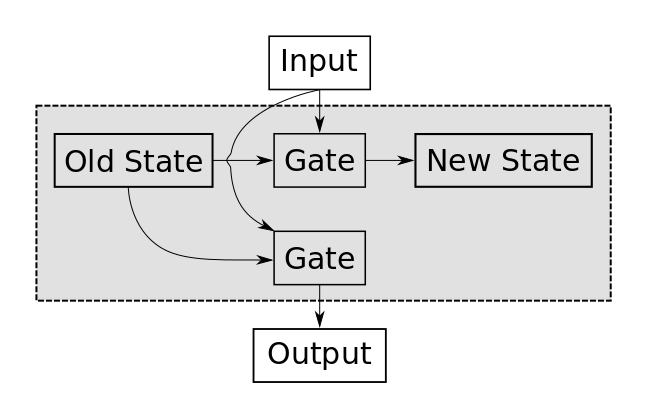

In [0]:
from IPython.display import Image
Image('recurrent_unit.png')

**Why multiple layer of GRU:**

The recent success of deep CNN in image classification and object detection demonstrates that deep, hierarchical models can be more efficient at learning representation than shallower ones. This motivated our work to use deeper GRU architecture. We use three layers of GRU.

**Unrolled Network**

Another way to visualize and understand a Recurrent Neural Network is to "unroll" the recursion. In this figure there is only a single recurrent unit denoted RU, which will receive a text-word from the input sequence in a series of time-steps.

The initial memory-state of the RU is reset to zero internally by Keras / TensorFlow every time a new sequence begins.

In the first time-step the word "this" is input to the RU which uses its internal state (initialized to zero) and its gate to calculate the new state. The RU also uses its other gate to calculate the output but it is ignored here because it is only needed at the end of the sequence to output a kind of summary.

In the second time-step the word "is" is input to the RU which now uses the internal state that was just updated from seeing the previous word "this".

There is not much meaning in the words "this is" so the RU probably doesn't save anything important in its internal state from seeing these words. But when it sees the third word "not" the RU has learned that it may be important for determining the overall sentiment of the input-text, so it needs to be stored in the memory-state of the RU, which can be used later when the RU sees the word "good" in time-step 6

Saving unrolled_3layers_flowchart.png to unrolled_3layers_flowchart.png


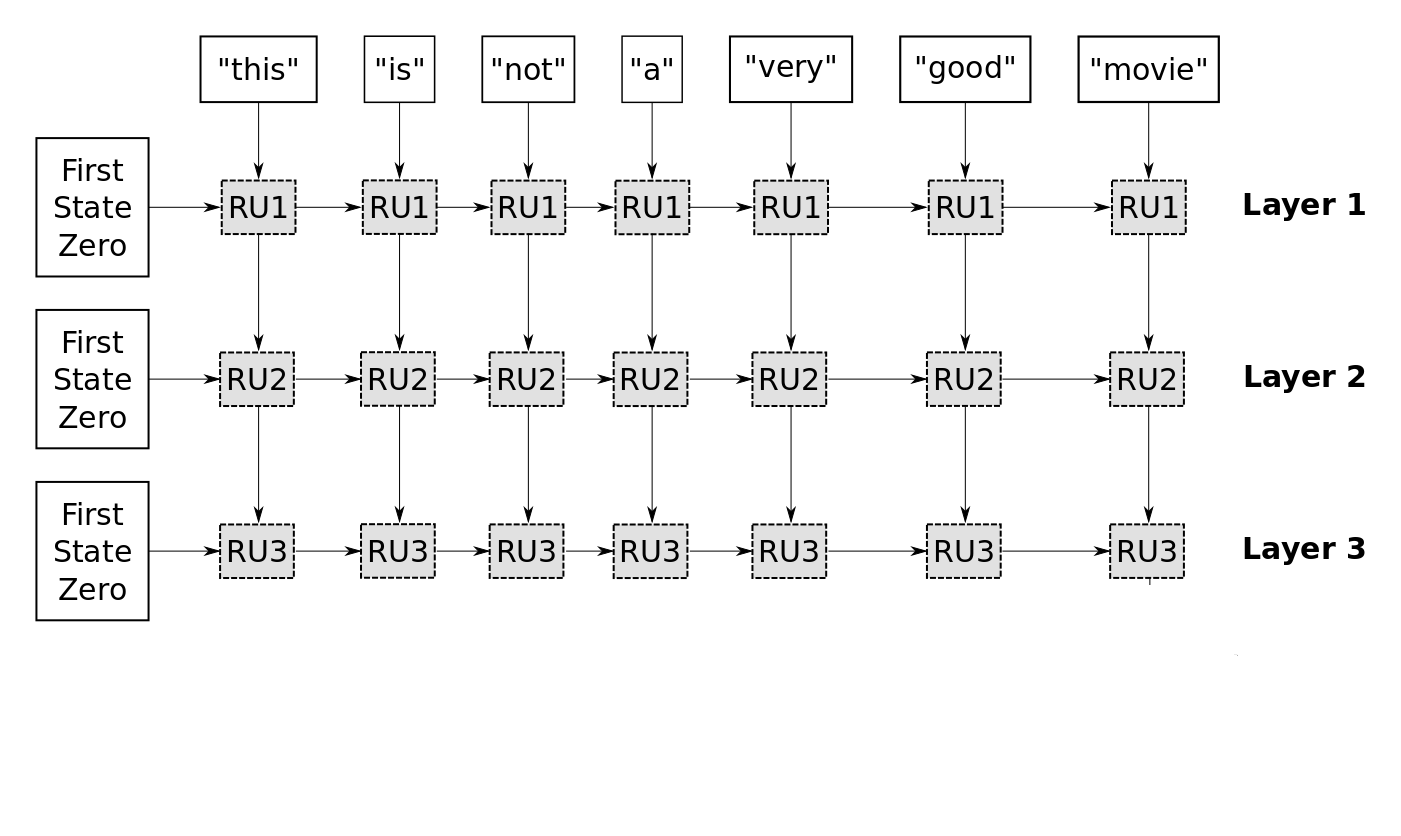

In [0]:
from IPython.display import Image
Image('unrolled_3layers_flowchart.png')


**3-Layer Unrolled Network**

In this tutorial we will use a Recurrent Neural Network with 3 recurrent units (or layers) denoted RU1, RU2 and RU3 in the "unrolled" figure below.

The first layer is much like the unrolled figure above for a single-layer RNN. First the recurrent unit RU1 has its internal state initialized to zero by Keras / TensorFlow. Then the word "this" is input to RU1 and it updates its internal state. Then it processes the next word "is", and so forth. But instead of outputting a single summary value at the end of the sequence, we use the output of RU1 for every time-step. This creates a new sequence that can then be used as input for the next recurrent unit RU2. The same process is repeated for the second layer and this creates a new output sequence which is then input to the third layer's recurrent unit RU3

#Code Analysis
Below code can be executed on google colab. It would require seven to eight hour for whole execution with GPU enabled mode. We need three python packages (keras, download and cache) apart from default installed packaged in google colab system. The import statement combines two operations; it searches for the named module, then it binds the results of that search to a name in the local scope. Below section captures the detail of all import needed.

os: This module provides a portable way of using operating system dependent functionality.

json: This module exposes an APIs for operate on json data

pickle: The pickle module implements an algorithm for serializing and de-serializing a Python object structure. “Pickling” is the process whereby a Python object hierarchy is converted into a byte stream.

sys: This module provides access to some variables used or maintained by the interpreter and to functions that interact strongly with the interpreter.

Matplotlib: is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms.

Cache: module is a human interface to an underlying cache. It makes it easy to switch caching on or off in different environments and makes it easy to bust through the cache in particular situations.

PIL (Python Imaging Library): adds support for opening, manipulating, and saving many different image file formats

numpy: package for scientific computing with Python



In [0]:
!pip install keras
!pip install download
!pip install cache

%matplotlib inline

import os
import json
import pickle
import download
import sys
import urllib.request
import tarfile
import zipfile
import collections
import math



import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from cache import Cache
from PIL import Image
import numpy as np

    100% |████████████████████████████████| 51kB 9.7MB/s 
  Running setup.py bdist_wheel for cache ... - done
  Stored in directory: /content/.cache/pip/wheels/61/8d/8d/5049f508a0d0f90705927ab33cb66df9c0673d71e6696dbc04
Successfully built cache


I will use the COCO data-set which contains many images with text-captions. Downloading may be trivial operation but it is back bone of whole execution for colab. Few imp things to remember:

    a) Downloading and unzip with python library is extremely slow.
    b) First download the data with wget and unzip it in respective directory. It seems to be working good.
    c) Always do clean-up before starting in your environment as if your programme got interrupted due to disconnect then you would not want to work with stale data.

You can change the data-directory if you want to save the data-files somewhere else.
These data-files are VERY large! The file for the training-data is 19 GB and the file for the validation-data is 816 MB!

Below code is for downloading the COCO data-set from the internet. This data-set contains images and various associated data such as text-captions describing the images.

**Format:**

The COCO data-set contains a large number of images and various data for each image stored in a JSON-file. Functionality is provided for getting a list of image-filenames (but not actually loading the images) along with their associated data such as text-captions describing the contents of the images.

Directory where data would be download and save the data-set.

    data_dir = "data/coco/"

Sub-directories for the training- and validation-sets.
      
     train_dir = "data/coco/train2017"
     val_dir = "data/coco/val2017"

Base-URL for the data-sets on the internet.

    data_url = "http://images.cocodataset.org/"




In [0]:
!rm -rf data  && mkdir -p data/coco
!cd data/coco && wget http://images.cocodataset.org/zips/train2017.zip && \
  wget http://images.cocodataset.org/zips/val2017.zip && \
  wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip

--2018-06-30 02:24:27--  http://images.cocodataset.org/zips/train2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 74.125.141.128, 2607:f8b0:400c:c06::80
Connecting to images.cocodataset.org (images.cocodataset.org)|74.125.141.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19336861798 (18G) [application/zip]
Saving to: ‘train2017.zip’

train2017.zip        20%[===>                ]   3.62G  55.8MB/s    eta 4m 40s 

train2017.zip       100%[===================>]  18.01G  58.4MB/s    in 6m 13s  

2018-06-30 02:30:41 (49.4 MB/s) - ‘train2017.zip’ saved [19336861798/19336861798]

--2018-06-30 02:30:41--  http://images.cocodataset.org/zips/val2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 74.125.141.128, 2607:f8b0:400c:c06::80
Connecting to images.cocodataset.org (images.cocodataset.org)|74.125.141.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 815585330 (778M) [application/zip]
Saving to: ‘val2017.zip’

val2017.zip         100%[===================>] 777.80M   140MB/s    in 5.9s    

2018-06-30 02:30:47 (132 MB/s) - ‘val2017.zip’ saved [815585330/815585330]

--2018-06-30 02:30:47--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 74.125.141.128, 2607:f8b0:400c:c06::80
Connecting to images.cocodataset.org (images.cocodataset.org)|74.125.141.128|:80... connected.
HTTP 

annotations_trainva 100%[===================>] 241.19M  56.8MB/s    in 4.2s    

2018-06-30 02:30:53 (56.8 MB/s) - ‘annotations_trainval2017.zip’ saved [252907541/252907541]



Unzip all the downloaded data and list it to verify the all the directory. Please make sure to redirect all o/p to null as o/p extracting individual image will fill all your screen.

In [0]:
!ls data/coco
!rm -rf data/coco/val2017
!ls data/coco
!cd  data/coco && unzip val2017.zip > /dev/null && unzip annotations_trainval2017.zip > /dev/null && unzip train2017.zip > /dev/null
!ls data/coco
#!rm -rf coco && git clone https://github.com/pdollar/coco.git && cd coco/PythonAPI && make && make install && python setup.py install


annotations_trainval2017.zip  train2017.zip  val2017  val2017.zip
annotations_trainval2017.zip  train2017.zip  val2017.zip
annotations		      train2017      val2017
annotations_trainval2017.zip  train2017.zip  val2017.zip


Keras is a model-level library, providing high-level building blocks for developing deep learning models. It does not handle itself low-level operations such as tensor products, convolutions and so on. Instead, it relies on a specialized, well-optimized tensor manipulation library to do so, serving as the "backend engine" of Keras. We are importing various modules from keras.

**Model**: Provides various apis for modelling the neural network. We will use the functional model.

**Backend**: help in writing code compatible with both Theano (th) and TensorFlow (tf).The code below instantiates an input placeholder. It's equivalent to tf.placeholder() or th.tensor.matrix(),  th.tensor.tensor3(), etc.

    inputs = K.placeholder(shape=(2, 4, 5))
Also works:

    inputs = K.placeholder(shape=(None, 4, 5))
Also works:

    inputs = K.placeholder(ndim=3)

**Layers**: defines the function for modifying the weight and dictionary containing the configuration of the layer depending on layer type.

**Optimizers**: we would be using RMSprop optimizer in our programme.

**Callbacks**: A callback is a set of functions to be applied at given stages of the training procedure. You can use callbacks to get a view on internal states and statistics of the model during training

**Preprocessing**: As name suggest being used for pre-processing text and sequences.





In [0]:
from keras.models import Model
from keras import backend as K
from keras.layers import Input, Dense, GRU, Embedding
from keras.applications import DenseNet201
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

Please make sure the compatability between the keras version and tenserflow as incompatability would result in unnecessary and unneeded issue related to compilation.
I have run this on collab.If you are running on local system then use the same tenserflow version.

In [0]:
tf.__version__

'1.9.0-rc1'

Directory where you want to download and save the data-set.Set this before you start calling any of the functions below.Use the function set_data_dir() to also update train_dir and val_dir.

In [0]:
data_dir = "data/coco/"

# Sub-directories for the training- and validation-sets.
train_dir = "data/coco/train2017"
val_dir = "data/coco/val2017"

# Base-URL for the data-sets on the internet.
data_url = "http://images.cocodataset.org/"

Helper fuction for setting the data dir if it has been changed to any other location.

In [0]:
def set_data_dir(new_data_dir):
    """
    Set the base-directory for data-files and then
    set the sub-dirs for training and validation data.
    """

    # Ensure we update the global variables.
    global data_dir, train_dir, val_dir

    data_dir = new_data_dir
    train_dir = os.path.join(new_data_dir, "train2017")
    val_dir = os.path.join(new_data_dir, "val2017")
    
#set_data_dir("data/coco/")

Load the image-filenames and captions for either the training-set or the validation-set. At the end of this function we will have tuple containing the info about the image id, filename and associated caption. The zip() function take iterables (can be zero or more), makes iterator that aggregates elements based on the iterables passed, and returns an iterator of tuples. In below usage it will return 3 tuples of ids, filenames and captions.

In [0]:
def _load_records(train=True):
    """
    Load the image-filenames and captions
    for either the training-set or the validation-set.
    """

    if train:
        # Training-set.
        filename = "captions_train2017.json"
    else:
        # Validation-set.
        filename = "captions_val2017.json"

    # Full path for the data-file.
    path = os.path.join(data_dir, "annotations", filename)

    # Load the file.
    with open(path, "r", encoding="utf-8") as file:
        data_raw = json.load(file)

    # Convenience variables.
    images = data_raw['images']
    annotations = data_raw['annotations']

    # Initialize the dict for holding our data.
    # The lookup-key is the image-id.
    records = dict()

    # Collect all the filenames for the images.
    for image in images:
        # Get the id and filename for this image.
        image_id = image['id']
        filename = image['file_name']

        # Initialize a new data-record.
        record = dict()

        # Set the image-filename in the data-record.
        record['filename'] = filename

        # Initialize an empty list of image-captions
        # which will be filled further below.
        record['captions'] = list()

        # Save the record using the the image-id as the lookup-key.
        records[image_id] = record

    # Collect all the captions for the images.
    for ann in annotations:
        # Get the id and caption for an image.
        image_id = ann['image_id']
        caption = ann['caption']

        # Lookup the data-record for this image-id.
        # This data-record should already exist from the loop above.
        record = records[image_id]

        # Append the current caption to the list of captions in the
        # data-record that was initialized in the loop above.
        record['captions'].append(caption)

    # Convert the records-dict to a list of tuples.
    records_list = [(key, record['filename'], record['captions'])
                    for key, record in sorted(records.items())]

    # Convert the list of tuples to separate tuples with the data.
    ids, filenames, captions = zip(*records_list)

    return ids, filenames, captions

Cache wrapper function save the result of calling a function or creating an object-instance to harddisk. This is used to persist the data so it can be reloaded very quickly and easily. If the cache-file exists then the data is reloaded and returned, otherwise the function is called and the result is saved to cache. The pickle module can transform a complex object into a byte stream and it can transform the byte stream into an object with the same internal structure.


Pickle.dump writes a pickled representation of object to the open file object file which can be unpickeled on demand. Hence it kind of makes python object persistent by storing them in a file. Pickle stores the data in binary format and hence make it compact and non-readable.


In [0]:
def cache(cache_path, fn, *args, **kwargs):
    """
    Cache-wrapper for a function or class. If the cache-file exists
    then the data is reloaded and returned, otherwise the function
    is called and the result is saved to cache. The fn-argument can
    also be a class instead, in which case an object-instance is
    created and saved to the cache-file.
    :param cache_path:
        File-path for the cache-file.
    :param fn:
        Function or class to be called.
    :param args:
        Arguments to the function or class-init.
    :param kwargs:
        Keyword arguments to the function or class-init.
    :return:
        The result of calling the function or creating the object-instance.
    """

    # If the cache-file exists.
    if os.path.exists(cache_path):
        # Load the cached data from the file.
        with open(cache_path, mode='rb') as file:
            obj = pickle.load(file)

        print("- Data loaded from cache-file: " + cache_path)
    else:
        # The cache-file does not exist.

        # Call the function / class-init with the supplied arguments.
        obj = fn(*args, **kwargs)

        # Save the data to a cache-file.
        with open(cache_path, mode='wb') as file:
            pickle.dump(obj, file)

        print("- Data saved to cache-file: " + cache_path)

    return obj

load_records function load the data-records for the data-set. This returns the image ids, filenames and text-captions for either the training-set or validation-set. This wraps 

    _load_records () above with a cache, so if the cache-file already exists then it is loaded instead of processing the original data-file. 
      param train: Bool whether to load the training-set (True) or validation-set (False). 
      return: ids, filenames, captions for the images in the data-set

Call of this function results in creation of records_train.pkl and records_val.pkl if it does not exist


In [0]:
def load_records(train=True):
    if train:
        # Cache-file for the training-set data.
        cache_filename = "records_train.pkl"
    else:
        # Cache-file for the validation-set data.
        cache_filename = "records_val.pkl"

    # Path for the cache-file.
    cache_path = os.path.join(data_dir, cache_filename)

    # If the data-records already exist in a cache-file then load it,
    # otherwise call the _load_records() function and save its
    # return-values to the cache-file so it can be loaded the next time.
    records = cache(cache_path=cache_path,
                    fn=_load_records,
                    train=train)

    return records

Below function execution gets the filenames and captions for the images in the training-set. This will load the records from train2017.zip and load them in pickle file so that in next execution iteration, we don't need to parse the file again. We print the num_images in training set.

In [0]:
_, filenames_train, captions_train = load_records(train=True)
num_images_train = len(filenames_train)
num_images_train

- Data saved to cache-file: data/coco/records_train.pkl


118287

Below function execution gets the filenames and captions for the images in the validation-set. This will load the records from val2017.zip and load them in pickle file so that in next execution iteration, we don't need to parse the file again. We print the num_images in validation set. This time, argument passed in load_records function is False.

In [0]:
_, filenames_val, captions_val = load_records(train=False)

- Data saved to cache-file: data/coco/records_val.pkl


This is a helper-function for loading and resizing an image. This help in pre-processing of input data to neural network. This function resizes the image and scale image pixel to fall between 0.0 and 0.1

**Why do we need to pre-process our pixels?** Pixel values often lie in the [0,255] range. Feeding these values directly into a network may lead to numerical overflows. It also turns out that some choices for activation and objective functions are not compatible with all kinds of input. The wrong combination results in a network doing a poor job at learning.
Resizing using Lanczos sampling
Let's understand why we have use Lanczos resampling here.

**When to use Resizing**

If you don’t have any fully connected (FC) layer in your network, you can apply the network to images of virtually any size. If you have your FC then weights shape depends on input shape. Only exception If the FC Layer isn’t dependent on the input image’s dimensions then you wouldn’t have to worry about this problem. This is the case when people use globalAveragePooling and pass that output to FC. This basically converts your feature maps to one number and hence it’s not dependent on your input image’s dimensions.

**Resampling**

Rescaling or resampling is the technique used to create a new version of an image with a different size. Increasing the size of the image is called upsampling, and reducing the size of an image is called downsampling. It turns out that these operations are not lossless. When an image is scaled up to a larger size, there is a question of what will be the colour of the new pixels in between the original pixels. There are two obvious answers:

a) **Replication**
The first answer consists in doubling each original pixels. This solution is called "replication" to the nearest neighbour because the value is the one of the nearest neighbour giving preference to the right or left neighbour for neighbours at the same distance.

b) **Interpolation**
The second answer consists in using the mean value of the nearest known pixels. This solution is called "interpolation". It consists in blending the values of surrounding original pixels according to their distance. The easiest way to do this is to draw a line between the two samples and to pick the value along the line. It is a linear interpolation since we use straight lines between samples.
In case of intensity image, Interpolation solution is the best one because the first produces blocky effects whilst the second produces a smoother image. However, in case of region maps, the Replication is the only possible solution since the first one add new labels.


 **Implementation by Convolution**
 
More general way to implement these technique is convolution. The convolution defines a general principle for the interpolation. The interpolation kernel k(i) defines the list of neighbours to be considered and the weight assigned to them for calculating the value of the central pixel. By choosing the suitable filter, we can define different types of reconstruction.
This implementation by convolution has several advantages:
a) It provides a uniform way to implement many different types of interpolation by choosing a suitable convolution kernel.
b) It is easy to extend this method to different scaling and different dimensions (2D, 3D, etc.).

 **Lanczos**
 
The theoretically optimal reconstruction filter for band-limited signals is the since filter, which has infinite support. The Lanczos filter is one of many practical (finitely supported) approximations of the sinc filter. Each interpolated value is the weighted sum of 2a consecutive input samples. The Lanczos convolution kernel k(x) is defined as:


    k(x) = | sinc(x).sinc(x/a) ; if |x| < a
                    | 0 otherwise 
where a is constant This algorithm provides the best results, however it is extremely time-consuming.

In [0]:
def load_image(path, size=None):
    """
    Load the image from the given file-path and resize it
    to the given size if not None.
    """

    # Load the image using PIL.
    img = Image.open(path)

    # Resize image if desired.
    if not size is None:
        img = img.resize(size=size, resample=Image.LANCZOS)

    # Convert image to numpy array.
    img = np.array(img)

    # Scale image-pixels so they fall between 0.0 and 1.0
    img = img / 255.0

    # Convert 2-dim gray-scale array to 3-dim RGB array.
    if (len(img.shape) == 2):
        img = np.repeat(img[:, :, np.newaxis], 3, axis=2)

    return img

This is a helper-function for showing an image from the data-set along with its captions.

In [0]:
def show_image(idx, train):
    """
    Load and plot an image from the training- or validation-set
    with the given index.
    """

    if train:
        # Use an image from the training-set.
        dir = train_dir
        filename = filenames_train[idx]
        captions = captions_train[idx]
    else:
        # Use an image from the validation-set.
        dir = val_dir
        filename = filenames_val[idx]
        captions = captions_val[idx]

    # Path for the image-file.
    path = os.path.join(dir, filename)

    # Print the captions for this image.
    for caption in captions:
        print(caption)
    
    # Load the image and plot it.
    img = load_image(path)
    plt.imshow(img)
    plt.show()

Example Image
Show an example image and captions from the training-set.If you are not able to see the image then it means there is an issue with loading the coco database and processing the record. We need to rerun the all the above steps from scratch.

A giraffe eating food from the top of the tree.
A giraffe standing up nearby a tree 
A giraffe mother with its baby in the forest.
Two giraffes standing in a tree filled area.
A giraffe standing next to a forest filled with trees.


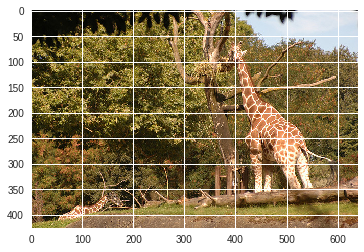

In [0]:
show_image(idx=1, train=True)

#Pre-Trained Image Model (Densenet 201)
The following creates an instance of the Densenet201 model using the Keras API. This automatically downloads the required files if you don't have them already.

The Densenet201 model was pre-trained on the ImageNet data-set for classifying images. The Densenet201 model contains a convolutional part and a fully-connected (or dense) part which is used for the image classification. It provides the best results among all the densenet model implemented in keras.

If include_top=True then the whole Densent201 model is downloaded which is about 80 MB.
We will use some of the fully-connected layers in this pre-trained model, so we have to download the full model, but if you have a slow internet connection, then you can try and modify the code below to use the smaller pre-trained model without the classification layers.


#Notes on Transfer Learning:

The dense layers are responsible for combining features from the convolutional layers and this helps in the final classification. So when the Densenet201 model is used on another dataset we may have to replace all the dense layers with the target Dense Layer.

The difference between Transfer Learning and Fine-Tuning is that in Transfer Learning we only optimize the weights of the new classification layers we have added, while we keep the weights of the original Densenet model. In Fine-Tuning we optimize both the weights of the new classification layers we have added, as well as some or all of the layers from the Densenet model. Here we are doing on Transfer learning to downsize the running time.
The shape of the tensors expected as input by the pre-trained Densenet model. In this case it is images of shape 224 x 224 x 3.

First we input and process an image with the Densenet201 model. Just prior to the final classification layer of the Densenet201 model, we save the so-called Transfer Values to a cache-file.

The reason for using a cache-file is that it takes a long time to process an image with the Densenet model. If each image is processed more than once then we can save a lot of time by caching the transfer-value.

When all the images in the new data-set have been processed through the Densenet201 model and the resulting transfer-values saved to a cache file, then we can use those transfer-values as the input to GRU network. We will then train the GRU using the classes from the new data-set. In this way, the Densenet model is used to extract useful information from the images and pass it to GRU for further usage. Thus it help in achieving significantly higher classification accuracy with reduced execution time.

We are also printing a list of all the layers in the Densenet201.

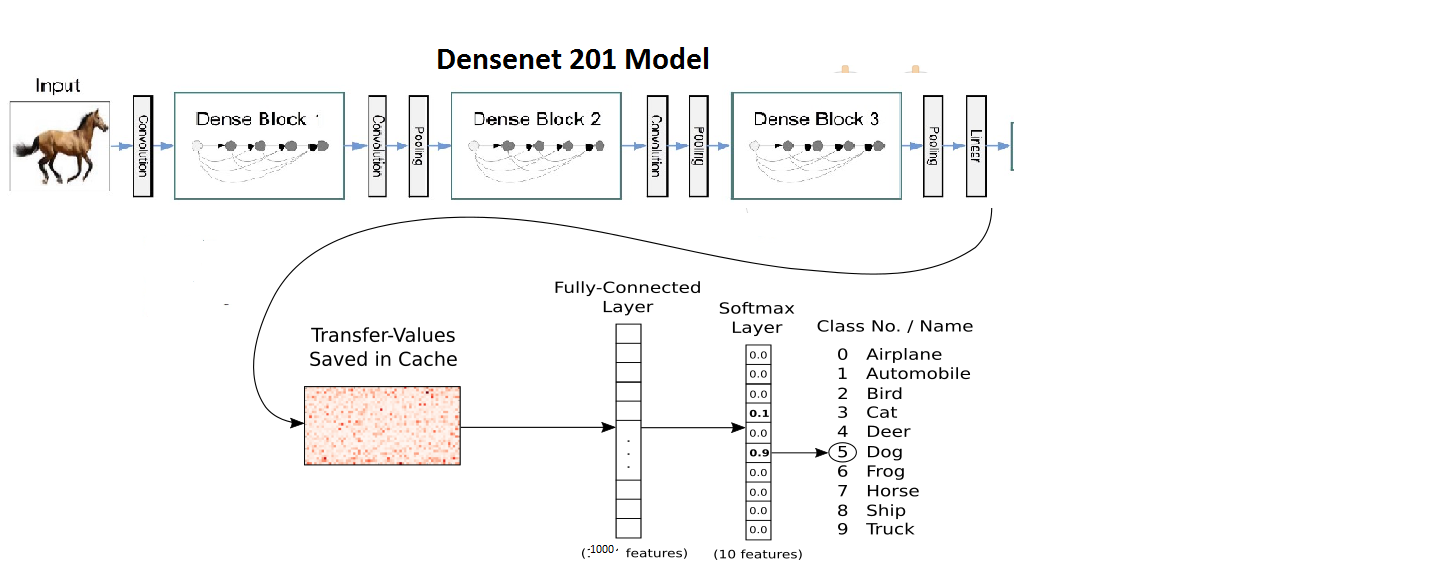

In [0]:
from IPython.display import Image, display
Image('transfer_learning_flowchart.png')

In [0]:
image_model  = DenseNet201(include_top=True, weights='imagenet')

image_model.summary()

84082688/84080072 [==============================] - 1s 0us/step
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
____________________________________________

__________________________________________________________________________________________________
conv4_block16_2_conv (Conv2D)   (None, 14, 14, 32)   36864       conv4_block16_1_relu[0][0]       
__________________________________________________________________________________________________
conv4_block16_concat (Concatena (None, 14, 14, 768)  0           conv4_block15_concat[0][0]       
                                                                 conv4_block16_2_conv[0][0]       
__________________________________________________________________________________________________
conv4_block17_0_bn (BatchNormal (None, 14, 14, 768)  3072        conv4_block16_concat[0][0]       
__________________________________________________________________________________________________
conv4_block17_0_relu (Activatio (None, 14, 14, 768)  0           conv4_block17_0_bn[0][0]         
__________________________________________________________________________________________________
conv4_bloc

conv5_block16_1_relu (Activatio (None, 7, 7, 128)    0           conv5_block16_1_bn[0][0]         
__________________________________________________________________________________________________
conv5_block16_2_conv (Conv2D)   (None, 7, 7, 32)     36864       conv5_block16_1_relu[0][0]       
__________________________________________________________________________________________________
conv5_block16_concat (Concatena (None, 7, 7, 1408)   0           conv5_block15_concat[0][0]       
                                                                 conv5_block16_2_conv[0][0]       
__________________________________________________________________________________________________
conv5_block17_0_bn (BatchNormal (None, 7, 7, 1408)   5632        conv5_block16_concat[0][0]       
__________________________________________________________________________________________________
conv5_block17_0_relu (Activatio (None, 7, 7, 1408)   0           conv5_block17_0_bn[0][0]         
__________

We will use the output of the layer prior to the final fully connected layer which is named avg_pool. This is an average pooling layer. Average pooling brings all the feature of previous layer to count and flows it to next layer which means all values actually are used for feature mapping and creating output - which is a much generalized computation. As texture and edges would have been already learned in initial layers.

In [0]:
transfer_layer  = image_model.get_layer('avg_pool')

We call it the "transfer-layer" because we will transfer its output to another model that creates the image captions. To do this, first we need to create a new model which has the same input as the original densenet model but outputs the transfer-values from the avg_pool layer.

In [0]:
image_model_transfer = Model(inputs=image_model.input,
                             outputs=transfer_layer.output)

The model expects input images to be of this size:

In [0]:
img_size = K.int_shape(image_model.input)[1:3]

In [0]:
img_size

(224, 224)

For each input image, the new model will output a vector of transfer-values with this length.K.int_shape returns the shape of variable as a tuple of int. In our case it return vector of length 1920.

In [0]:
transfer_values_size = K.int_shape(transfer_layer.output)[1]
transfer_values_size

1920


#Process All Images
We now make functions for processing all images in the data-set using the pre-trained image-model and saving the transfer-values in a cache-file so they can be reloaded quickly.

We effectively create a new data-set of the transfer-values. This is because it takes a long time to process an image in the denset201 model. We will not be changing all the parameters of the densenet201 model, so every time it processes an image, it gives the exact same result. We need the transfer-values to train the image-captioning model for many epochs, so we save a lot of time by calculating the transfer-values once and saving them in a cache-file.

This is a helper-function for printing the progress.

In [0]:
def print_progress(count, max_count):
    # Percentage completion.
    pct_complete = count / max_count

    # Status-message. Note the \r which means the line should
    # overwrite itself.
    msg = "\r- Progress: {0:.1%}".format(pct_complete)

    # Print it.
    sys.stdout.write(msg)
    sys.stdout.flush()

This is the function for processing the given files using the densenet201-model and returning their transfer-values. This function process the images in batches to take advantage of spatial Locality. We allocate an image batch of shape (32, 224, 224, 3) means 32  images of size 224*224 in RGB mode (number of data, image_height, image_width, image_depth).You can manipulate the batch size depending on your RAM. If your computer crashes or becomes very slow because you run out of RAM, then you may try and lower this number, but you may then need to perform more optimization iterations. This function returns an array of transfer_value for all input images.

In [0]:
def process_images(data_dir, filenames, batch_size=32):
    """
    Process all the given files in the given data_dir using the
    pre-trained image-model and return their transfer-values.
    
    Note that we process the images in batches to save
    memory and improve efficiency on the GPU.
    """
    
    # Number of images to process.
    num_images = len(filenames)

    # Pre-allocate input-batch-array for images.
    shape = (batch_size,) + img_size + (3,)
    image_batch = np.zeros(shape=shape, dtype=np.float16)

    # Pre-allocate output-array for transfer-values.
    # Note that we use 16-bit floating-points to save memory.
    shape = (num_images, transfer_values_size)
    transfer_values = np.zeros(shape=shape, dtype=np.float16)

    # Initialize index into the filenames.
    start_index = 0

    # Process batches of image-files.
    while start_index < num_images:
        # Print the percentage-progress.
        print_progress(count=start_index, max_count=num_images)

        # End-index for this batch.
        end_index = start_index + batch_size

        # Ensure end-index is within bounds.
        if end_index > num_images:
            end_index = num_images

        # The last batch may have a different batch-size.
        current_batch_size = end_index - start_index

        # Load all the images in the batch.
        for i, filename in enumerate(filenames[start_index:end_index]):
            # Path for the image-file.
            path = os.path.join(data_dir, filename)

            # Load and resize the image.
            # This returns the image as a numpy-array.
            img = load_image(path, size=img_size)

            # Save the image for later use.
            image_batch[i] = img

        # Use the pre-trained image-model to process the image.
        # Note that the last batch may have a different size,
        # so we only use the relevant images.
        transfer_values_batch = \
            image_model_transfer.predict(image_batch[0:current_batch_size])

        # Save the transfer-values in the pre-allocated array.
        transfer_values[start_index:end_index] = \
            transfer_values_batch[0:current_batch_size]

        # Increase the index for the next loop-iteration.
        start_index = end_index

    # Print newline.
    print()

    return transfer_values

Helper-function for processing all images in the training-set. This saves the transfer-values in a cache-file for fast reloading.

In [0]:
def process_images_train():
    print("Processing {0} images in training-set ...".format(len(filenames_train)))

    # Path for the cache-file.
    cache_path = os.path.join(data_dir,
                              "transfer_values_train.pkl")

    # If the cache-file already exists then reload it,
    # otherwise process all images and save their transfer-values
    # to the cache-file so it can be reloaded quickly.
    transfer_values = cache(cache_path=cache_path,
                            fn=process_images,
                            data_dir=train_dir,
                            filenames=filenames_train)

    return transfer_values

Helper-function for processing all images in the validation-set

In [0]:
def process_images_val():
    print("Processing {0} images in validation-set ...".format(len(filenames_val)))

    # Path for the cache-file.
    cache_path = os.path.join(data_dir, "transfer_values_val.pkl")

    # If the cache-file already exists then reload it,
    # otherwise process all images and save their transfer-values
    # to the cache-file so it can be reloaded quickly.
    transfer_values = cache(cache_path=cache_path,
                            fn=process_images,
                            data_dir=val_dir,
                            filenames=filenames_val)

    return transfer_values

Process all images in the training-set and save the transfer-values to a cache-file. This took about 60 minutes to process in google colab GPU.

In [0]:
transfer_values_train = process_images_train()

Processing 118287 images in training-set ...
- Progress: 100.0%


- Data saved to cache-file: data/coco/transfer_values_train.pkl


In [0]:
print("dtype:", transfer_values_train.dtype)
print("shape:", transfer_values_train.shape)

dtype: float16
shape: (118287, 1920)


Process all images in the validation-set and save the transfer-values to a cache-file. This took about 5 mins.

In [0]:
transfer_values_val = process_images_val()
print("dtype:", transfer_values_val.dtype)
print("shape:", transfer_values_val.shape)

Processing 5000 images in validation-set ...
- Progress: 99.8%
- Data saved to cache-file: data/coco/transfer_values_val.pkl
dtype: float16
shape: (5000, 1920)


#Tokenizer

A neural network cannot work directly on text-strings so we must convert it somehow. There are two steps in this conversion, the first step is called the "tokenizer" which converts words to integers and is done on the data-set before it is input to the neural network. The second step is an integrated part of the neural network itself and is called the "embedding"-layer which is to convert integer-tokens into vectors of floating-point numbers.

Before we can start processing the text, we first need to mark the beginning and end of each text-sequence with unique words that most likely aren't present in the data.

In [0]:
mark_start = 'ssss '
mark_end = ' eeee'

This helper-function wraps all text-strings in the above markers. Note that the captions are a list of list, so we need a nested for-loop to process it. This can be done using so-called list-comprehension in Python.

In [0]:
def mark_captions(captions_listlist):
   captions_marked = [[mark_start + caption + mark_end
                       for caption in captions_list]
                       for captions_list in captions_listlist]
   return captions_marked

Now process all the captions in the training-set and show an example.

In [0]:
captions_train_marked = mark_captions(captions_train)
captions_train_marked[0]

['ssss Closeup of bins of food that include broccoli and bread. eeee',
 'ssss A meal is presented in brightly colored plastic trays. eeee',
 'ssss there are containers filled with different kinds of foods eeee',
 'ssss Colorful dishes holding meat, vegetables, fruit, and bread. eeee',
 'ssss A bunch of trays that have different food. eeee']

This is how the captions look without the start- and end-markers.

In [0]:
captions_train[0]

['Closeup of bins of food that include broccoli and bread.',
 'A meal is presented in brightly colored plastic trays.',
 'there are containers filled with different kinds of foods',
 'Colorful dishes holding meat, vegetables, fruit, and bread.',
 'A bunch of trays that have different food.']

This helper-function converts a list-of-list to a flattened list of captions.

In [0]:
def flatten(captions_listlist):
    captions_list = [caption
                     for captions_list in captions_listlist
                     for caption in captions_list]
    return captions_list

Now use the function to convert all the marked captions of the coco annotation training set in a flattened list.

In [0]:
captions_train_flat = flatten(captions_train_marked)

Set the maximum number of words in our vocabulary. This means that we will only use e.g. the 10000 most frequent words in the captions from the training-data and instruct the tokenizer to only use e.g. the 10000 most popular words from the data-set.

In [0]:
num_words = 10000

We need a few more functions than provided by Keras' Tokenizer-class so we wrap it.

The tokenizer can then be "fitted" to the data-set. This scans through all the text and strips it from unwanted characters such as punctuation, and also converts it to lower-case characters. The tokenizer then builds a vocabulary of all unique words along with various data-structures for accessing the data.

Note that we fit the tokenizer on the entire data-set so it gathers words from both the training- and test-data. This is OK as we are merely building a vocabulary and want it to be as complete as possible. The actual neural network will of course only be trained on the training-set.

If you want to use the entire vocabulary then set num_words=None in argument, and then it will automatically set to the vocabulary-size.


We can then inspect the vocabulary that has been gathered by the tokenizer. This is ordered by the number of occurrences of the words in the data-set. These integer-numbers are called word indices or "tokens" because they uniquely identify each word in the vocabulary.

tokenizer.word_index

We have also defined some  helper functions:



token_to_word: We create the inverse mapping from integer-tokens back to words, which is needed to reconstruct text-strings from lists of tokens. This mapping is implemented in the init function.token_to_word  function lookup a single word from an integer-token using this mapping.


tokens_to_string: Convert a list of integer-tokens to a string.We can recreate this text except for punctuation and other symbols, by converting the list of tokens back to words.

captions_to_tokens: Convert a list-of-list with text-captions to a list-of-list of integer-tokens.




In [0]:
class TokenizerWrap(Tokenizer):
    """Wrap the Tokenizer-class from Keras with more functionality."""
    
    def __init__(self, texts, num_words=None):
        """
        :param texts: List of strings with the data-set.
        :param num_words: Max number of words to use.
        """

        Tokenizer.__init__(self, num_words=num_words)

        # Create the vocabulary from the texts.
        self.fit_on_texts(texts)

        # Create inverse lookup from integer-tokens to words.
        self.index_to_word = dict(zip(self.word_index.values(),
                                      self.word_index.keys()))
        
    def token_to_word(self, token):
        """Lookup a single word from an integer-token."""

        word = " " if token == 0 else self.index_to_word[token]
        return word 

    def tokens_to_string(self, tokens):
        """Convert a list of integer-tokens to a string."""

        # Create a list of the individual words.
        words = [self.index_to_word[token]
                 for token in tokens
                 if token != 0]
        
        # Concatenate the words to a single string
        # with space between all the words.
        text = " ".join(words)

        return text
    
    def captions_to_tokens(self, captions_listlist):
        """
        Convert a list-of-list with text-captions to
        a list-of-list of integer-tokens.
        """
        
        # Note that text_to_sequences() takes a list of texts.
        tokens = [self.texts_to_sequences(captions_list)                  
                  for captions_list in captions_listlist]
        
        return tokens

Now create a tokenizer using all the captions in the training-data. Note that we use the flattened list of captions to create the tokenizer because it cannot take a list-of-lists.

In [0]:
tokenizer = TokenizerWrap(texts=captions_train_flat,
                          num_words=num_words)

Get the integer-token for the start-marker (the word "ssss"). We will need this further below.

In [0]:
token_start = tokenizer.word_index[mark_start.strip()]
token_start

2

Get the integer-token for the end-marker (the word "eeee").

In [0]:
token_end = tokenizer.word_index[mark_end.strip()]
token_end

3

Convert all the captions from the training-set to sequences of integer-tokens. We get a list-of-list as a result.Example of the integer-tokens for the captions of the first image in the training-set:

In [0]:
tokens_train = tokenizer.captions_to_tokens(captions_train_marked)
tokens_train[0]

[[2, 841, 5, 2864, 5, 61, 26, 1984, 238, 9, 433, 3],
 [2, 1, 429, 10, 3310, 7, 1025, 390, 501, 1110, 3],
 [2, 63, 19, 993, 143, 8, 190, 958, 5, 743, 3],
 [2, 299, 725, 25, 343, 208, 264, 9, 433, 3],
 [2, 1, 170, 5, 1110, 26, 446, 190, 61, 3]]

This text corresponds to the above list of tokens:

In [0]:
captions_train_marked[0]

['ssss Closeup of bins of food that include broccoli and bread. eeee',
 'ssss A meal is presented in brightly colored plastic trays. eeee',
 'ssss there are containers filled with different kinds of foods eeee',
 'ssss Colorful dishes holding meat, vegetables, fruit, and bread. eeee',
 'ssss A bunch of trays that have different food. eeee']

#Data Generator
Each image in the training-set has at least 5 captions describing the contents of the image. The neural network will be trained with batches of transfer-values for the images and sequences of integer-tokens for the captions. Out of two below choices: 

a) Match numpy arrays for the training-set: we would either have to only use a single caption for each image and ignore the rest of this valuable caption data.

b)  Repeat the image transfer-values for each of the captions: This would waste a lot of memory.


These are bad solutions because either the throw away a lot of valuable data or the waste a lot of custom data generator memory. A better solution is to create a custom data-generator for Keras that will create a batch of data with randomly selected transfer-values and token-sequences.Thus that will generate that will generate random batches of data during the
training. 

get_random_caption_tokens:This helper-function returns a list of random token-sequences for the images with the given indices in the training-set.




In [0]:
def get_random_caption_tokens(idx):
    """
    Given a list of indices for images in the training-set,
    select a token-sequence for a random caption,
    and return a list of all these token-sequences.
    """
    
    # Initialize an empty list for the results.
    result = []

    # For each of the indices.
    for i in idx:
        # The index i points to an image in the training-set.
        # Each image in the training-set has at least 5 captions
        # which have been converted to tokens in tokens_train.
        # We want to select one of these token-sequences at random.

        # Get a random index for a token-sequence.
        j = np.random.choice(len(tokens_train[i]))

        # Get the j'th token-sequence for image i.
        tokens = tokens_train[i][j]

        # Add this token-sequence to the list of results.
        result.append(tokens)

    return result

This generator function creates random batches of training-data for use in training the neural network. We run this function in random batches for as long as we want so it starts by getting a list of random indices of images in the training set then it gets the transfer values for those random images and then we use the helper function get_random_caption_tokens that we just saw to get random captions or integer tokens for those captions for those images then we pad those sequences of integers with zeros so they all have the same length as the longest sequence. We create the input and output data by time-shifting these sequences of integer tokens then we wrap all of this data in dictionaries where we name the data so we are sure that it is assigned correctly in our model and then we return the data.

In short, we have created a cache file with the transfer values for all of the images in the training set then our generator function creates a random batch of data by taking some of these transfer values and the corresponding sequence of integer tokens and then time shift in this sequence here so it becomes like this sequence down here and it creates a whole batch of this data so that we can input that to the decoder model.

When padding or truncating the sequences that have a different length, we need to determine if we want to do this padding or truncating 'pre' or 'post'. If a sequence is truncated, it means that a part of the sequence is simply thrown away. If a sequence is padded, it means that zeros are added to the sequence. So the choice of 'pre' or 'post' can be important because it determines whether we throw away the first or last part of a sequence when truncating, and it determines whether we add zeros to the beginning or end of the sequence when padding. This may confuse the Recurrent Neural Network. 

Here we have taken the max len as the maximum length of the captions. We can also modify the value of maxlen with mean plus twice of standard deviation. This would be a compromise so we save a lot of memory and have to truncate maybe 5% of all the sequences. Sequences that are too long should be truncated at the end. Since we don't need memory optimization, we will pad all sequences to the max_length.

In [0]:
def batch_generator(batch_size):
    """
    Generator function for creating random batches of training-data.
    
    Note that it selects the data completely randomly for each
    batch, corresponding to sampling of the training-set with
    replacement. This means it is possible to sample the same
    data multiple times within a single epoch - and it is also
    possible that some data is not sampled at all within an epoch.
    However, all the data should be unique within a single batch.
    """

    # Infinite loop.
    while True:
        # Get a list of random indices for images in the training-set.
        idx = np.random.randint(num_images_train,
                                size=batch_size)
        
        # Get the pre-computed transfer-values for those images.
        # These are the outputs of the pre-trained image-model.
        transfer_values = transfer_values_train[idx]

        # For each of the randomly chosen images there are
        # at least 5 captions describing the contents of the image.
        # Select one of those captions at random and get the
        # associated sequence of integer-tokens.
        tokens = get_random_caption_tokens(idx)

        # Count the number of tokens in all these token-sequences.
        num_tokens = [len(t) for t in tokens]
        
        # Max number of tokens.
        max_tokens = np.max(num_tokens)
        
        # Pad all the other token-sequences with zeros
        # so they all have the same length and can be
        # input to the neural network as a numpy array.
        tokens_padded = pad_sequences(tokens,
                                      maxlen=max_tokens,
                                      padding='post',
                                      truncating='post')
        
        # Further prepare the token-sequences.
        # The decoder-part of the neural network
        # will try to map the token-sequences to
        # themselves shifted one time-step.
        decoder_input_data = tokens_padded[:, 0:-1]
        decoder_output_data = tokens_padded[:, 1:]

        # Dict for the input-data. Because we have
        # several inputs, we use a named dict to
        # ensure that the data is assigned correctly.
        x_data = \
        {
            'decoder_input': decoder_input_data,
            'transfer_values_input': transfer_values
        }

        # Dict for the output-data.
        y_data = \
        {
            'decoder_output': decoder_output_data
        }
        
        yield (x_data, y_data)

Set the batch-size used during training. This is set very high so the GPU can be used maximally but this also requires a lot of RAM on the GPU. You may have to lower this number if the training runs out of memory.

In [0]:
batch_size = 1024

Create an instance of the data-generator.

In [0]:
generator = batch_generator(batch_size=batch_size)

Test the data-generator by creating a batch of data.

In [0]:
batch  =  next(generator)
batch_x = batch[0]
batch_y = batch[1]

Example of the transfer-values for the first image in the batch.

In [0]:
batch_x['transfer_values_input'][0]

array([ 8.649e-05,  4.075e-04, -4.792e-04, ..., -1.595e-01, -6.149e-02,
       -7.310e-01], dtype=float16)

Example of the token-sequence for the first image in the batch. This is the input to the decoder-part of the neural network.

In [0]:
batch_x['decoder_input'][0]

array([   2,   14, 7351,   16,   66,  275,   10,  261,  104, 3176,  628,
          3,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0], dtype=int32)

This is the token-sequence for the output of the decoder. Note how it is the same as the sequence above, except it is shifted one time-step.

In [0]:
batch_y['decoder_output'][0]

array([  14, 7351,   16,   66,  275,   10,  261,  104, 3176,  628,    3,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0], dtype=int32)

#Steps Per Epoch

One epoch is a complete processing of the training-set. We would like to process each image and caption pair only once per epoch. However, because each batch is chosen completely at random in the above batch-generator, it is possible that an image occurs in multiple batches within a single epoch, and it is possible that some images may not occur in any batch at all within a single epoch.

Nevertheless, we still use the concept of an 'epoch' to measure approximately how many iterations of the training-data we have processed. But the data-generator will generate batches for eternity, so we need to manually calculate the approximate number of batches required per epoch.

This is the number of captions for each image in the training-set.

In [0]:
num_captions_train = [len(captions) for captions in captions_train]

This is the total number of captions in the training-set.

In [0]:
total_num_captions_train  = np.sum(num_captions_train)

This is the approximate number of batches required per epoch, if we want to process each caption and image pair once per epoch.

In [0]:
steps_per_epoch = int(total_num_captions_train / batch_size)
steps_per_epoch

577

We will now create the Recurrent Neural Network (RNN) that will be trained to map the vectors with transfer-values from the image-recognition model into sequences of integer-tokens that can be converted into text. We call this neural network for the 'decoder'.

There are two ways to build Keras models: sequential and functional.

The sequential API allows you to create models layer-by-layer for most problems. It is limited in that it does not allow you to create models that share layers or have multiple inputs or outputs.

Ex: 


```
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(2, input_dim=1))
model.add(Dense(1))
```

Alternatively, the functional API allows you to create models that have a lot more flexibility as you can easily define models where layers connect to more than just the previous and next layers. In fact, you can connect layers to (literally) any other layer. As a result, creating complex networks such as siamese networks and residual networks become possible.

```
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense

visible = Input(shape=(2,))  
hidden = Dense(2)(visible)
model = Model(inputs=visible, outputs=hidden)

```


Note that we are using the functional model from Keras to build this neural network, because it allows more flexibility in how the neural network can be connected.

In case you want to experiment and connect the image-model directly to the decoder.This means we have split the network construction into two parts: 
(1) Creation of all the layers that are not yet connected

(2) A function that connects all these layers.

The decoder consists of 3 GRU layers whose internal state-sizes are:

In [0]:
state_size = 512

The embedding-layer converts integer-tokens into vectors of this length:

In [0]:
embedding_size = 128

This inputs transfer-values to the decoder:

In [0]:
transfer_values_input = Input(shape=(transfer_values_size,),
                              name='transfer_values_input')

We want to use the transfer-values to initialize the internal states of the GRU units. This informs the GRU units of the contents of the images. The transfer-values are vectors of length 1920 but the size of the internal states of the GRU units are only 512, so we use a fully-connected layer to map the vectors from 1920 to 512 elements.

Note that we use a tanh activation function to limit the output of the mapping between -1 and 1, otherwise this does not seem to work.

In [0]:
decoder_transfer_map = Dense(state_size,
                             activation='tanh',
                             name='decoder_transfer_map')

This is the input for token-sequences to the decoder. Using None in the shape means that the token-sequences can have arbitrary lengths.

In [0]:
decoder_input = Input(shape=(None, ), name='decoder_input')

This is the embedding-layer which converts sequences of integer-tokens to sequences of vectors.

In [0]:
decoder_embedding = Embedding(input_dim=num_words,
                              output_dim=embedding_size,
                              name='decoder_embedding')

This creates the 3 GRU layers of the decoder. Note that they all return sequences because we ultimately want to output a sequence of integer-tokens that can be converted into a text-sequence.

In [0]:
decoder_gru1  = GRU(state_size, name='decoder_gru1',
                   return_sequences=True)
decoder_gru2 = GRU(state_size, name='decoder_gru2',
                   return_sequences=True)
decoder_gru3 = GRU(state_size, name='decoder_gru3',
                   return_sequences=True)

The GRU layers output a tensor with shape [batch_size, sequence_length, state_size], where each "word" is encoded as a vector of length state_size. We need to convert this into sequences of integer-tokens that can be interpreted as words from our vocabulary.

One way of doing this is to convert the GRU output to a one-hot encoded array. It works but it is extremely wasteful, because for a vocabulary of e.g. 10000 words we need a vector with 10000 elements, so we can select the index of the highest element to be the integer-token.

Note that the activation-function is set to linear instead of softmax as we would normally use for one-hot encoded outputs, because there is apparently a bug in Keras so we need to make our own loss-function, as described in detail further below.

In [0]:
decoder_dense = Dense(num_words,
                      activation='linear',
                      name='decoder_output')

The decoder is built using the functional API of Keras, which allows more flexibility in connecting the layers e.g. to have multiple inputs. This is useful e.g. if you want to connect the image-model directly with the decoder instead of using pre-calculated transfer-values.

This function connects all the layers of the decoder to some input of transfer-values.

In [0]:
def connect_decoder(transfer_values):
    # Map the transfer-values so the dimensionality matches
    # the internal state of the GRU layers. This means
    # we can use the mapped transfer-values as the initial state
    # of the GRU layers.
    initial_state = decoder_transfer_map(transfer_values)

    # Start the decoder-network with its input-layer.
    net = decoder_input
    
    # Connect the embedding-layer.
    net = decoder_embedding(net)
    
    # Connect all the GRU layers.
    net = decoder_gru1(net, initial_state=initial_state)
    net = decoder_gru2(net, initial_state=initial_state)
    net = decoder_gru3(net, initial_state=initial_state)

    # Connect the final dense layer that converts to
    # one-hot encoded array
    decoder_output = decoder_dense(net)
    
    return decoder_output

Connect and create the model used for training. This takes as input transfer-values and sequences of integer-tokens and outputs sequences of one-hot encoded arrays that can be converted into integer-tokens.

In [0]:
decoder_output = connect_decoder(transfer_values=transfer_values_input)

decoder_model = Model(inputs=[transfer_values_input, decoder_input],
                      outputs=[decoder_output])

#Loss Function
The output of the decoder is a sequence of one-hot encoded arrays. In order to train the decoder we need to supply the one-hot encoded arrays that we desire to see on the decoder's output, and then use a loss-function like cross-entropy to train the decoder to produce this desired output.

However, our data-set contains integer-tokens instead of one-hot encoded arrays. Each one-hot encoded array has 10000 elements so it would be extremely wasteful to convert the entire data-set to one-hot encoded arrays. We could do this conversion from integers to one-hot arrays in the batch_generator() above.

A better way is to use a so-called sparse cross-entropy loss-function, which does the conversion internally from integers to one-hot encoded arrays. Unfortunately, there seems to be a bug in Keras when using this with Recurrent Neural Networks as it fails with dimension mismatch array.it cannot automatically deduce the correct shape of the decoder's output data.


The decoder outputs a 3-rank tensor with shape [batch_size, sequence_length, num_words] which contains batches of sequences of one-hot encoded arrays of length num_words. We will compare this to a 2-rank tensor with shape [batch_size, sequence_length] containing sequences of integer-tokens.

This comparison is done with a sparse-cross-entropy function directly from TensorFlow. There are several things to note here.

Firstly, the loss-function calculates the softmax internally to improve numerical accuracy - this is why we used a linear activation function in the last dense-layer of the decoder-network above.

Secondly, the loss-function from TensorFlow will output a 2-rank tensor of shape [batch_size, sequence_length] given these inputs. But this must ultimately be reduced to a single scalar-value whose gradient can be derived by TensorFlow so it can be optimized using gradient descent. Keras supports some weighting of loss-values across the batch but the semantics are unclear so to be sure that we calculate the loss-function across the entire batch and across the entire sequences, we manually calculate the loss average.

In [0]:
def sparse_cross_entropy(y_true, y_pred):
    """
    Calculate the cross-entropy loss between y_true and y_pred.
    
    y_true is a 2-rank tensor with the desired output.
    The shape is [batch_size, sequence_length] and it
    contains sequences of integer-tokens.

    y_pred is the decoder's output which is a 3-rank tensor
    with shape [batch_size, sequence_length, num_words]
    so that for each sequence in the batch there is a one-hot
    encoded array of length num_words.
    """

    # Calculate the loss. This outputs a
    # 2-rank tensor of shape [batch_size, sequence_length]
    loss = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y_true,
                                                          logits=y_pred)

    # Keras may reduce this across the first axis (the batch)
    # but the semantics are unclear, so to be sure we use
    # the loss across the entire 2-rank tensor, we reduce it
    # to a single scalar with the mean function.
    loss_mean = tf.reduce_mean(loss)

    return loss_mean

#Compile the Training Model
We have used the Adam optimizer in many of the previous tutorials, but it seems to diverge in some of these experiments with Recurrent Neural Networks. RMSprop seems to work much better for these.

In [0]:
optimizer = RMSprop(lr=1e-3)

There seems to be another bug in Keras so it cannot automatically deduce the correct shape of the decoder's output data. We therefore need to manually create a placeholder variable for the decoder's output. The shape is set to (None, None) which means the batch can have an arbitrary number of sequences, which can have an arbitrary number of integer-tokens.

In [0]:
decoder_target  = tf.placeholder(dtype='int32', shape=(None, None))

We can now compile the model using our custom loss-function.

In [0]:
#decoder_model.compile(optimizer=optimizer,
#                      loss='sparse_categorical_crossentropy')
decoder_model.compile(optimizer=optimizer,
                      loss=sparse_cross_entropy,
                      target_tensors=[decoder_target])

#Callback Functions
During training we want to save checkpoints and log the progress to TensorBoard so we create the appropriate callbacks for Keras.

This is the callback for writing checkpoints during training.

In [0]:
path_checkpoint = '22_checkpoint.keras'
callback_checkpoint = ModelCheckpoint(filepath=path_checkpoint,
                                      verbose=1,
                                      save_weights_only=True)

This is the callback for writing the TensorBoard log during training.

In [0]:
callback_tensorboard = TensorBoard(log_dir='./22_logs/',
                                   histogram_freq=0,
                                   write_graph=False)

In [0]:
callbacks = [callback_checkpoint, callback_tensorboard]

#Load Checkpoint
You can reload the last saved checkpoint so you don't have to train the model every time you want to use it.

In [0]:
try:
    decoder_model.load_weights(path_checkpoint)
except Exception as error:
    print("Error trying to load checkpoint.")
    print(error)

Error trying to load checkpoint.
Unable to open file (unable to open file: name = '22_checkpoint.keras', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)


#Train the Model
Now we will train the decoder so it can map transfer-values from the image-model to sequences of integer-tokens for the captions of the images.

One epoch of training took about 20 minutes on a google colab GPU. You probably need to run 20 epochs or more during training.

Note that if we didn't use pre-computed transfer-values then each epoch would take maybe 60 minutes to run, because all the images would have to be processed by the densenet model as well.

In [0]:
decoder_model.fit_generator(generator=generator,
                            steps_per_epoch=steps_per_epoch,
                            epochs=20,
                            callbacks=callbacks)

Epoch 1/20
577/577 [==============================] - 867s 2s/step - loss: 1.4569

Epoch 00001: saving model to 22_checkpoint.keras
Epoch 2/20
259/577 [============>.................] - ETA: 7:53 - loss: 0.9718

577/577 [==============================] - 859s 1s/step - loss: 0.9468

Epoch 00002: saving model to 22_checkpoint.keras
Epoch 3/20
393/577 [===================>..........] - ETA: 4:33 - loss: 0.8880

577/577 [==============================] - 859s 1s/step - loss: 0.8798

Epoch 00003: saving model to 22_checkpoint.keras
Epoch 4/20
438/577 [=====================>........] - ETA: 3:22 - loss: 0.8676

577/577 [==============================] - 839s 1s/step - loss: 0.8619

Epoch 00004: saving model to 22_checkpoint.keras
Epoch 5/20
454/577 [======================>.......] - ETA: 3:02 - loss: 0.8210

577/577 [==============================] - 853s 1s/step - loss: 0.8205

Epoch 00005: saving model to 22_checkpoint.keras
Epoch 6/20
459/577 [======================>.......] - ETA: 2:54 - loss: 0.8007

577/577 [==============================] - 855s 1s/step - loss: 0.7979

Epoch 00006: saving model to 22_checkpoint.keras
Epoch 7/20
461/577 [======================>.......] - ETA: 2:56 - loss: 0.7589

577/577 [==============================] - 879s 2s/step - loss: 0.7573

Epoch 00007: saving model to 22_checkpoint.keras
Epoch 8/20
461/577 [======================>.......] - ETA: 2:53 - loss: 0.7581

577/577 [==============================] - 855s 1s/step - loss: 0.7625

Epoch 00008: saving model to 22_checkpoint.keras
Epoch 9/20
461/577 [======================>.......] - ETA: 2:53 - loss: 0.7423

577/577 [==============================] - 865s 1s/step - loss: 0.7382

Epoch 00009: saving model to 22_checkpoint.keras
Epoch 10/20
459/577 [======================>.......] - ETA: 2:56 - loss: 0.7269

577/577 [==============================] - 864s 1s/step - loss: 0.7242

Epoch 00010: saving model to 22_checkpoint.keras
Epoch 11/20
458/577 [======================>.......] - ETA: 2:58 - loss: 0.7138

577/577 [==============================] - 861s 1s/step - loss: 0.7154

Epoch 00011: saving model to 22_checkpoint.keras
Epoch 12/20
458/577 [======================>.......] - ETA: 2:56 - loss: 0.7091

577/577 [==============================] - 856s 1s/step - loss: 0.7068

Epoch 00012: saving model to 22_checkpoint.keras
Epoch 13/20
458/577 [======================>.......] - ETA: 2:56 - loss: 0.6971

577/577 [==============================] - 856s 1s/step - loss: 0.6949

Epoch 00013: saving model to 22_checkpoint.keras
Epoch 14/20
458/577 [======================>.......] - ETA: 2:57 - loss: 0.6844

577/577 [==============================] - 856s 1s/step - loss: 0.6840

Epoch 00014: saving model to 22_checkpoint.keras
Epoch 15/20
458/577 [======================>.......] - ETA: 2:55 - loss: 0.6763

577/577 [==============================] - 852s 1s/step - loss: 0.6759

Epoch 00015: saving model to 22_checkpoint.keras
Epoch 16/20
458/577 [======================>.......] - ETA: 2:54 - loss: 0.6705

577/577 [==============================] - 848s 1s/step - loss: 0.6700

Epoch 00016: saving model to 22_checkpoint.keras
Epoch 17/20
458/577 [======================>.......] - ETA: 2:53 - loss: 0.6697

577/577 [==============================] - 847s 1s/step - loss: 0.6633

Epoch 00017: saving model to 22_checkpoint.keras
Epoch 18/20
458/577 [======================>.......] - ETA: 2:57 - loss: 0.6436

577/577 [==============================] - 857s 1s/step - loss: 0.6468

Epoch 00018: saving model to 22_checkpoint.keras
Epoch 19/20
458/577 [======================>.......] - ETA: 2:57 - loss: 0.6349

577/577 [==============================] - 862s 1s/step - loss: 0.6341

Epoch 00019: saving model to 22_checkpoint.keras
Epoch 20/20
458/577 [======================>.......] - ETA: 2:59 - loss: 0.6227

577/577 [==============================] - 866s 2s/step - loss: 0.6258

Epoch 00020: saving model to 22_checkpoint.keras


#Generate Captions
This function loads an image and generates a caption using the model we have trained.

In [0]:
def generate_caption(image_path, max_tokens=30):
    """
    Generate a caption for the image in the given path.
    The caption is limited to the given number of tokens (words).
    """

    # Load and resize the image.
    image = load_image(image_path, size=img_size)
    
    # Expand the 3-dim numpy array to 4-dim
    # because the image-model expects a whole batch as input,
    # so we give it a batch with just one image.
    image_batch = np.expand_dims(image, axis=0)

    # Process the image with the pre-trained image-model
    # to get the transfer-values.
    transfer_values = image_model_transfer.predict(image_batch)

    # Pre-allocate the 2-dim array used as input to the decoder.
    # This holds just a single sequence of integer-tokens,
    # but the decoder-model expects a batch of sequences.
    shape = (1, max_tokens)
    decoder_input_data = np.zeros(shape=shape, dtype=np.int)

    # The first input-token is the special start-token for 'ssss '.
    token_int = token_start

    # Initialize an empty output-text.
    output_text = ''

    # Initialize the number of tokens we have processed.
    count_tokens = 0

    # While we haven't sampled the special end-token for ' eeee'
    # and we haven't processed the max number of tokens.
    while token_int != token_end and count_tokens < max_tokens:
        # Update the input-sequence to the decoder
        # with the last token that was sampled.
        # In the first iteration this will set the
        # first element to the start-token.
        decoder_input_data[0, count_tokens] = token_int

        # Wrap the input-data in a dict for clarity and safety,
        # so we are sure we input the data in the right order.
        x_data = \
        {
            'transfer_values_input': transfer_values,
            'decoder_input': decoder_input_data
        }

        # Note that we input the entire sequence of tokens
        # to the decoder. This wastes a lot of computation
        # because we are only interested in the last input
        # and output. We could modify the code to return
        # the GRU-states when calling predict() and then
        # feeding these GRU-states as well the next time
        # we call predict(), but it would make the code
        # much more complicated.
        
        # Input this data to the decoder and get the predicted output.
        decoder_output = decoder_model.predict(x_data)

        # Get the last predicted token as a one-hot encoded array.
        # Note that this is not limited by softmax, but we just
        # need the index of the largest element so it doesn't matter.
        token_onehot = decoder_output[0, count_tokens, :]

        # Convert to an integer-token.
        token_int = np.argmax(token_onehot)

        # Lookup the word corresponding to this integer-token.
        sampled_word = tokenizer.token_to_word(token_int)

        # Append the word to the output-text.
        output_text += " " + sampled_word

        # Increment the token-counter.
        count_tokens += 1

    # This is the sequence of tokens output by the decoder.
    output_tokens = decoder_input_data[0]

    # Plot the image.
    plt.imshow(image)
    plt.show()
    
    # Print the predicted caption.
    print("Predicted caption:")
    print(output_text)
    print()

Helper-function for loading an image from the COCO data-set and printing the true captions as well as the predicted caption.

In [0]:
def generate_caption_coco(idx, train=False):
    """
    Generate a caption for an image in the COCO data-set.
    Use the image with the given index in either the
    training-set (train=True) or validation-set (train=False).
    """
    
    if train:
        # Use image and captions from the training-set.
        data_dir = train_dir
        filename = filenames_train[idx]
        captions = captions_train[idx]
    else:
        # Use image and captions from the validation-set.
        data_dir = val_dir
        filename = filenames_val[idx]
        captions = captions_val[idx]

    # Path for the image-file.
    path = os.path.join(data_dir, filename)

    # Use the model to generate a caption of the image.
    generate_caption(image_path=path)

    # Print the true captions from the data-set.
    print("True captions:")
    for caption in captions:
        print(caption)

Try this on a picture from the training-set that the model has been trained on. In some cases the generated caption is actually better than the human-generated captions.

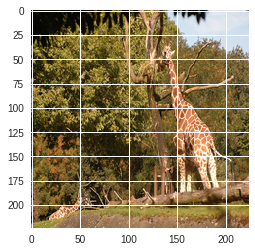

Predicted caption:
 a giraffe standing in a field with trees in the background eeee

True captions:
A giraffe eating food from the top of the tree.
A giraffe standing up nearby a tree 
A giraffe mother with its baby in the forest.
Two giraffes standing in a tree filled area.
A giraffe standing next to a forest filled with trees.


In [0]:
generate_caption_coco(idx=1, train=True)

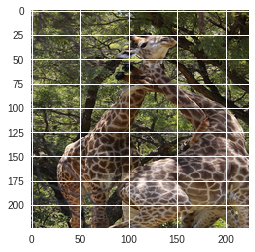

Predicted caption:
 a couple of giraffe standing next to a forest eeee

True captions:
A couple of giraffe snuggling each other in a forest.
A couple of giraffe standing next to some trees.
Two Zebras seem to be embracing in the wild. 
Two giraffes hang out near trees and nuzzle up to each other.
The two giraffes appear to be hugging each other.


In [0]:
generate_caption_coco(idx=10, train=True)

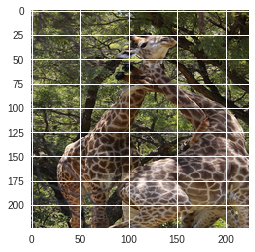

Predicted caption:
 a couple of giraffe standing next to a forest eeee

True captions:
A couple of giraffe snuggling each other in a forest.
A couple of giraffe standing next to some trees.
Two Zebras seem to be embracing in the wild. 
Two giraffes hang out near trees and nuzzle up to each other.
The two giraffes appear to be hugging each other.


In [0]:
generate_caption_coco(idx=10, train=True)

Here is a picture from the validation-set which was not used during training of the model. Sometimes the model can produce good captions for images it hasn't seen during training and sometimes it can't.

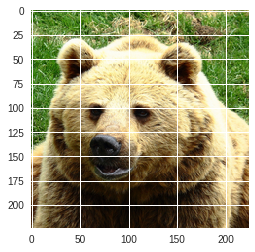

Predicted caption:
 a brown bear with a green collar standing in a field eeee

True captions:
A big burly grizzly bear is show with grass in the background.
The large brown bear has a black nose.
Closeup of a brown bear sitting in a grassy area.
A large bear that is sitting on grass. 
A close up picture of a brown bear's face.


In [0]:
generate_caption_coco(idx=1, train=False)

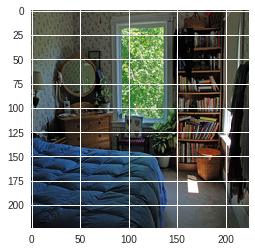

Predicted caption:
 a bedroom with a bed and a book on the wall eeee

True captions:
Bedroom scene with a bookcase, blue comforter and window.
A bedroom with a bookshelf full of books.
This room has a bed with blue sheets and a large bookcase
A bed and a mirror in a small room.
a bed room with a neatly made bed a window and a book shelf


In [0]:
generate_caption_coco(idx=2, train=False)

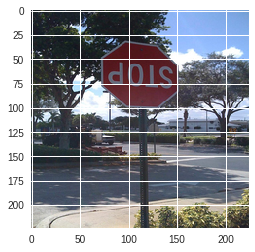

Predicted caption:
 a stop sign with a street sign on top of it eeee

True captions:
A stop sign is mounted upside-down on it's post. 
A stop sign that is hanging upside down.
An upside down stop sign by the road.
a stop sign put upside down on a metal pole 
A stop sign installed upside down on a street corner


In [0]:
generate_caption_coco(idx=3, train=False)

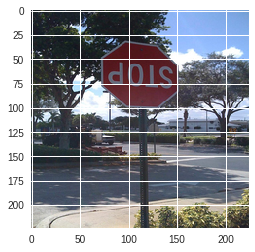

Predicted caption:
 a stop sign with a street sign on top of it eeee

True captions:
A stop sign is mounted upside-down on it's post. 
A stop sign that is hanging upside down.
An upside down stop sign by the road.
a stop sign put upside down on a metal pole 
A stop sign installed upside down on a street corner


In [0]:
generate_caption_coco(idx=3, train=False)

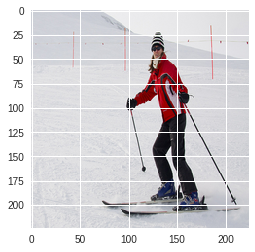

Predicted caption:
 a woman riding skis down a snow covered slope eeee

True captions:
A woman posing for the camera standing on skis.
a woman standing on skiis while posing for the camera
A woman in a red jacket skiing down a slope
A young woman is skiing down the mountain slope. 
a person on skis makes her way through the snow


In [0]:
generate_caption_coco(idx=5, train=False)

#Metric For Evaluation
Given the huge volume of our data, cannot possibly show the results for each image. Thus, we need a way to quantify the average accuracy of the system on the whole dataset. There are several metrics by which to judge the quality of machine-produced text,and none without criticism. Some example of metrics are:

    a) BLUE-N (Bilingual Evaluation Understudy)
    b) ROUGE-N: Recall-Oriented Understand for Gisting Evaluation
    c) Meteor: Metric for Evaluation of Translation with Explicit Ordering
    d) CIDEr: Consensus-based Image Description Evaluation


We can chose to use the Bilingual Evaluation Understudy (BLEU) metric, as it is one of the simplest and best known.Before describing the BLEU score, we will describe a simpler and better known metric, called the "precision". Let x be a  vector of machine-produced n-grams, and let y be a vector of ground truth n-grams. For example, x could be the words in a sentence describing a movie frame, with xi representing an individual word, and y could be words from scripts describing the same scene. We often wish to have a ground truth y representing the
many possible linguistic translations of the same idea.

The BLEU score is similar to the precision, except that each occurrence of an n-gram in y can account for only one occurrence in x. For example, the statement :The the the the the the would receive a perfect precision if the reference translation contained the word the, but not necessarily a perfect BLEU score, as we are limited to counting only as many occurrences of the as appear in y.

In [0]:
def _get_ngrams(segment, max_order):
  """Extracts all n-grams upto a given maximum order from an input segment.
  Args:
    segment: text segment from which n-grams will be extracted.
    max_order: maximum length in tokens of the n-grams returned by this
        methods.
  Returns:
    The Counter containing all n-grams upto max_order in segment
    with a count of how many times each n-gram occurred.
  """
  ngram_counts = collections.Counter()
  for order in range(1, max_order + 1):
    for i in range(0, len(segment) - order + 1):
      ngram = tuple(segment[i:i+order])
      ngram_counts[ngram] += 1
  return ngram_counts


def compute_bleu(reference_corpus, translation_corpus, max_order=4,
                 smooth=False):
  """Computes BLEU score of translated segments against one or more references.
  Args:
    reference_corpus: list of lists of references for each translation. Each
        reference should be tokenized into a list of tokens.
    translation_corpus: list of translations to score. Each translation
        should be tokenized into a list of tokens.
    max_order: Maximum n-gram order to use when computing BLEU score.
    smooth: Whether or not to apply Lin et al. 2004 smoothing.
  Returns:
    3-Tuple with the BLEU score, n-gram precisions, geometric mean of n-gram
    precisions and brevity penalty.
  """
  matches_by_order = [0] * max_order
  possible_matches_by_order = [0] * max_order
  reference_length = 0
  translation_length = 0
  for (references, translation) in zip(reference_corpus,
                                       translation_corpus):
    reference_length += min(len(r) for r in references)
    translation_length += len(translation)

    merged_ref_ngram_counts = collections.Counter()
    for reference in references:
      merged_ref_ngram_counts |= _get_ngrams(reference, max_order)
    translation_ngram_counts = _get_ngrams(translation, max_order)
    overlap = translation_ngram_counts & merged_ref_ngram_counts
    for ngram in overlap:
      matches_by_order[len(ngram)-1] += overlap[ngram]
    for order in range(1, max_order+1):
      possible_matches = len(translation) - order + 1
      if possible_matches > 0:
        possible_matches_by_order[order-1] += possible_matches

  precisions = [0] * max_order
  for i in range(0, max_order):
    if smooth:
      precisions[i] = ((matches_by_order[i] + 1.) /
                       (possible_matches_by_order[i] + 1.))
    else:
      if possible_matches_by_order[i] > 0:
        precisions[i] = (float(matches_by_order[i]) /
                         possible_matches_by_order[i])
      else:
        precisions[i] = 0.0

  if min(precisions) > 0:
    p_log_sum = sum((1. / max_order) * math.log(p) for p in precisions)
    geo_mean = math.exp(p_log_sum)
  else:
    geo_mean = 0

  ratio = float(translation_length) / reference_length

  if ratio > 1.0:
    bp = 1.
  else:
    bp = math.exp(1 - 1. / ratio)

  bleu = geo_mean * bp

  return (bleu, precisions, bp, ratio, translation_length, reference_length)

#bleu_score, _, _, _, _, _ = compute_bleu("hello is", "hello is", 1, False)
bleu_score, _, _, _, _, _ = compute_bleu(
      "a couple of giraffe standing next to a forest", "A couple of giraffe standing next to some trees", 1, False)
print(bleu_score *100)


80.0


#Conclusion
This tutorial showed how to generate captions for images. We used a pre-trained image-model (densenet201) to generate a "thought-vector" of what the image contains, and then we trained a Recurrent Neural Network to map this "thought-vector" to a sequence of words.We have also seen that GRU model train faster and give better performance on less data.we tried two different CNN implementations (densenet201 and vgg16) to check whether CNN feature vector output plays a role on the performance but we have not any major variation.

This works reasonably well. So does it really understand the objects and their interactions in each image? Or does it always regurgitate descriptions from the training data? Excitingly, our model does indeed develop the ability to generate accurate new captions when presented with completely new scenes, indicating a deeper understanding of the objects and context in the images. Moreover, it learns how to express that knowledge in natural-sounding English phrases despite receiving no additional language training other than reading the human captions. If it sees an image of a giraffe and correctly produces a caption stating that, it doesn't mean that the model has a deep understanding of what a giraffe is; the model doesn't know that it's a tall animal that lives in Africa and Zoos.It is also important to understand that this model doesn't have a human-like understanding of what the images contain.

The model is merely a clever way of mapping pixels in an image to a vector of floating-point numbers that summarize the contents of the image, and then map these numbers to a sequence of integers-tokens representing words. So the model is basically just a very advanced function approximator rather than human-like intelligence.

References:
Some of thereferences has been embedded in the ipythonsheet.

a) https://github.com/Hvass-Labs/TensorFlow-Tutorials

b)https://jovianlin.io/keras-models-sequential-vs-functional/

c)https://blog.keras.io/a-ten-minute-introduction-to-sequence-to-sequence-learning-in-keras.html

d)Safari Book: Deep Learning for computer Vision

e)http://adventuresinmachinelearning.com/keras-lstm-tutorial/

f)https://machinelearningmastery.com/encoder-decoder-attention-sequence-to-sequence-prediction-keras/

g)https://keras.io/applications/#densenet

h) https://arxiv.org/abs/1608.06993]

i) Last but Many thanks to Rohan Shravan without his active guidance and support this would not be possible.